In [3]:
from extern.fceux_learningenv.nes_python_interface.nes_python_interface import NESInterface
import extern.fceux_learningenv.nes_python_interface.nes_python_interface as nes_python_interface
#from extern.nes_async_rl.nes import NES
import pandas
from hsa.machine_constants import mario_rom_location
import random
import hsa.ba.rewards as rewards
import matplotlib.pyplot as plt

In [4]:
frameskip = 4

In [5]:
%matplotlib inline

In [6]:
emu = NESInterface(mario_rom_location)
#env = NES(mario_rom_location,outside_nes_interface=emu)

In [ ]:
del emu

In [10]:
action_set = emu.getMinimalActionSet()
def play_episode():
    emu.reset_game()
    reward_func = rewards.make_scaled_finer_main_reward()
    main_rewards = []
    rams = []
    while True:
        action = random.choice(action_set)
        for i in range(4):
            emu.act(action)
            ram = emu.getRAM()
            main_rewards.append(reward_func(ram))
            if emu.game_over():
                return main_rewards

In [11]:
example_episode_main_rewards = play_episode()

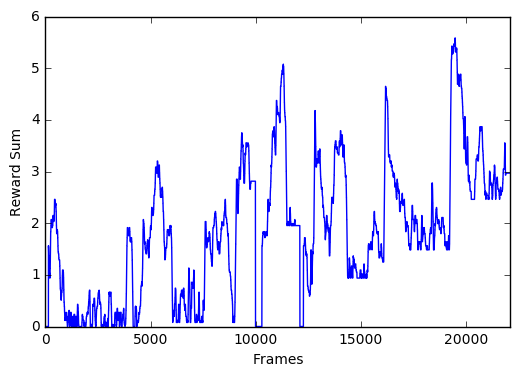

In [12]:
series_main_reward = pandas.Series(example_episode_main_rewards)
ax = series_main_reward.cumsum().plot()
ax.set(ylabel="Reward Sum",xlabel="Frames")
plt.savefig("RandomCumSum.pdf")

In [13]:
random_plays = pandas.DataFrame([play_episode() for i in range(30)])

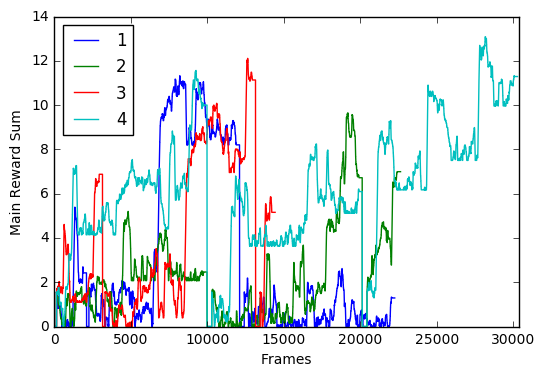

In [19]:
ax = random_plays.T[[1,2,3,4]].cumsum().plot()
ax.set(ylabel="Main Reward Sum",xlabel="Frames")
plt.savefig("RandomCumSumMore.pdf")

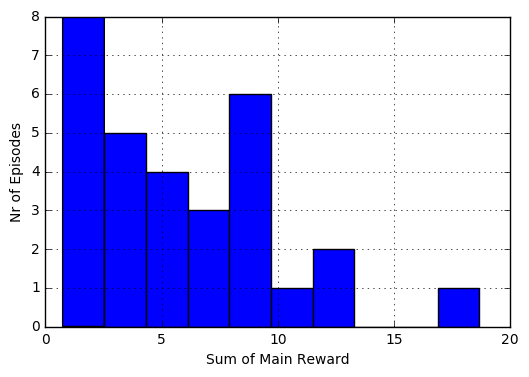

In [20]:
ax = random_plays.T.sum().hist()
ax.set(xlabel="Sum of Main Reward",ylabel="Nr of Episodes")
plt.savefig("RandomRewardHist.pdf")